**Projede, siyah-beyaz manga resimlerini renkli hale getirmek için Pix2PixHD modelinden yararlanılmaktadır. Pix2PixHD, yüksek kaliteli görüntü dönüşümleri sağlamak üzere NVIDIA tarafından geliştirilmiş bir GAN modelidir. Modeli geniş bir manga veri seti ile eğiterek gerçekçi ve doğru bir şekilde renklendirilmiş maga resimleri üretmeyi hedeflemektedir.**

# Drive'a Bağlan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Proje klasörünü oluştur

In [ ]:
!pip3 install datasets

import os

drive_path = '/content/drive/MyDrive/'
new_folder_name = 'pix2pix'
new_folder_path = os.path.join(drive_path, new_folder_name)
os.makedirs(new_folder_path, exist_ok=True)

print(f'Klasör oluşturuldu: {new_folder_path}')

%cd /content/drive/MyDrive/pix2pix

Klasör oluşturuldu: /content/drive/MyDrive/pix2pix
/content/drive/MyDrive/pix2pix


# Hugging Face'ten veri setini çek

Hugging Face'ten manga veri setini yükler ve siyah-beyaz ile renkli resimleri oluşturulan klasörlere kaydeder.

In [ ]:
import os
from PIL import Image
from datasets import load_dataset

# Veri setini yükle
dataset = load_dataset("MichaelP84/manga-colorization-dataset")

# Klasör yolları
output_train_A_path = '/content/drive/MyDrive/pix2pix/img/train_A'
output_train_B_path = '/content/drive/MyDrive/pix2pix/img/train_B'

# Klasörleri oluştur
os.makedirs(output_train_A_path, exist_ok=True)
os.makedirs(output_train_B_path, exist_ok=True)

# Resim sayısını başlat
image_count = 1

# Siyah-beyaz ve renkli resimleri işleyin
for split in ['train']:
    for example in dataset[split]:
        # Siyah-beyaz resimleri kaydet
        bw_image = example['bw_image']
        bw_img_filename = os.path.join(output_train_A_path, f"{image_count}.jpg")
        bw_image.save(bw_img_filename, 'JPEG')

        # Renkli resimleri kaydet
        color_image = example['color_image']
        color_img_filename = os.path.join(output_train_B_path, f"{image_count}.jpg")
        color_image.save(color_img_filename, 'JPEG')

        # Sayacı artır
        image_count += 1

print("Veri seti işleme tamamlandı.")


Resolving data files:   0%|          | 0/43 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/43 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/11920 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/36 [00:00<?, ?it/s]

Veri seti işleme tamamlandı.


# pix2pixHD deposunu klonla

NVIDIA'nın Pix2PixHD deposunu GitHub'dan klonlar ve gerekli dominate paketini yükler.

In [ ]:
!git clone https://github.com/NVIDIA/pix2pixHD
%cd pix2pixHD
!pip install dominate

Cloning into 'pix2pixHD'...
remote: Enumerating objects: 340, done.
remote: Total 340 (delta 0), reused 0 (delta 0), pack-reused 340
Receiving objects: 100% (340/340), 55.68 MiB | 12.56 MiB/s, done.
Resolving deltas: 100% (156/156), done.
Updating files: 100% (115/115), done.
/content/drive/MyDrive/pix2pix/pix2pixHD


# Veri Setini pix2pixHD klasörünün içine taşı

In [ ]:
import shutil

dosya = '/content/drive/MyDrive/pix2pix/img'
konum = '/content/drive/MyDrive/pix2pix/pix2pixHD/datasets'
shutil.move(dosya, konum)

print(f'Klasör {dosya} başarıyla {konum} konumuna taşındı.')

Klasör /content/drive/MyDrive/pix2pix/img başarıyla /content/drive/MyDrive/pix2pix/pix2pixHD/datasets konumuna taşındı.


# Eğitime başla

Eğitim sırasında oluşturulan görseller "/content/drive/MyDrive/pix2pix/pix2pixHD/checkpoints/img/web/images" klasörünün içinmde yer alıyor

In [ ]:
!python3 train.py --label_nc 0 --no_instance --name img --dataroot ./datasets/img --save_epoch_freq 5

# Eğitime devam et

Eğitim yarıda kesildiğinde, eğitime sıfırdan başlamak yerine kaldığı yerden devam ettir.


In [ ]:
!python3 train.py --label_nc 0 --no_instance --name img --dataroot ./datasets/img --save_epoch_freq 5 --continue_train

# Eğitilmiş modeli test et.

In [ ]:
!python3 test.py --name model --netG local --ngf 32 --resize_or_crop none $@

# 5 epoch eğitilmiş modelin sonucu


                  İnput                                          Output                               Color

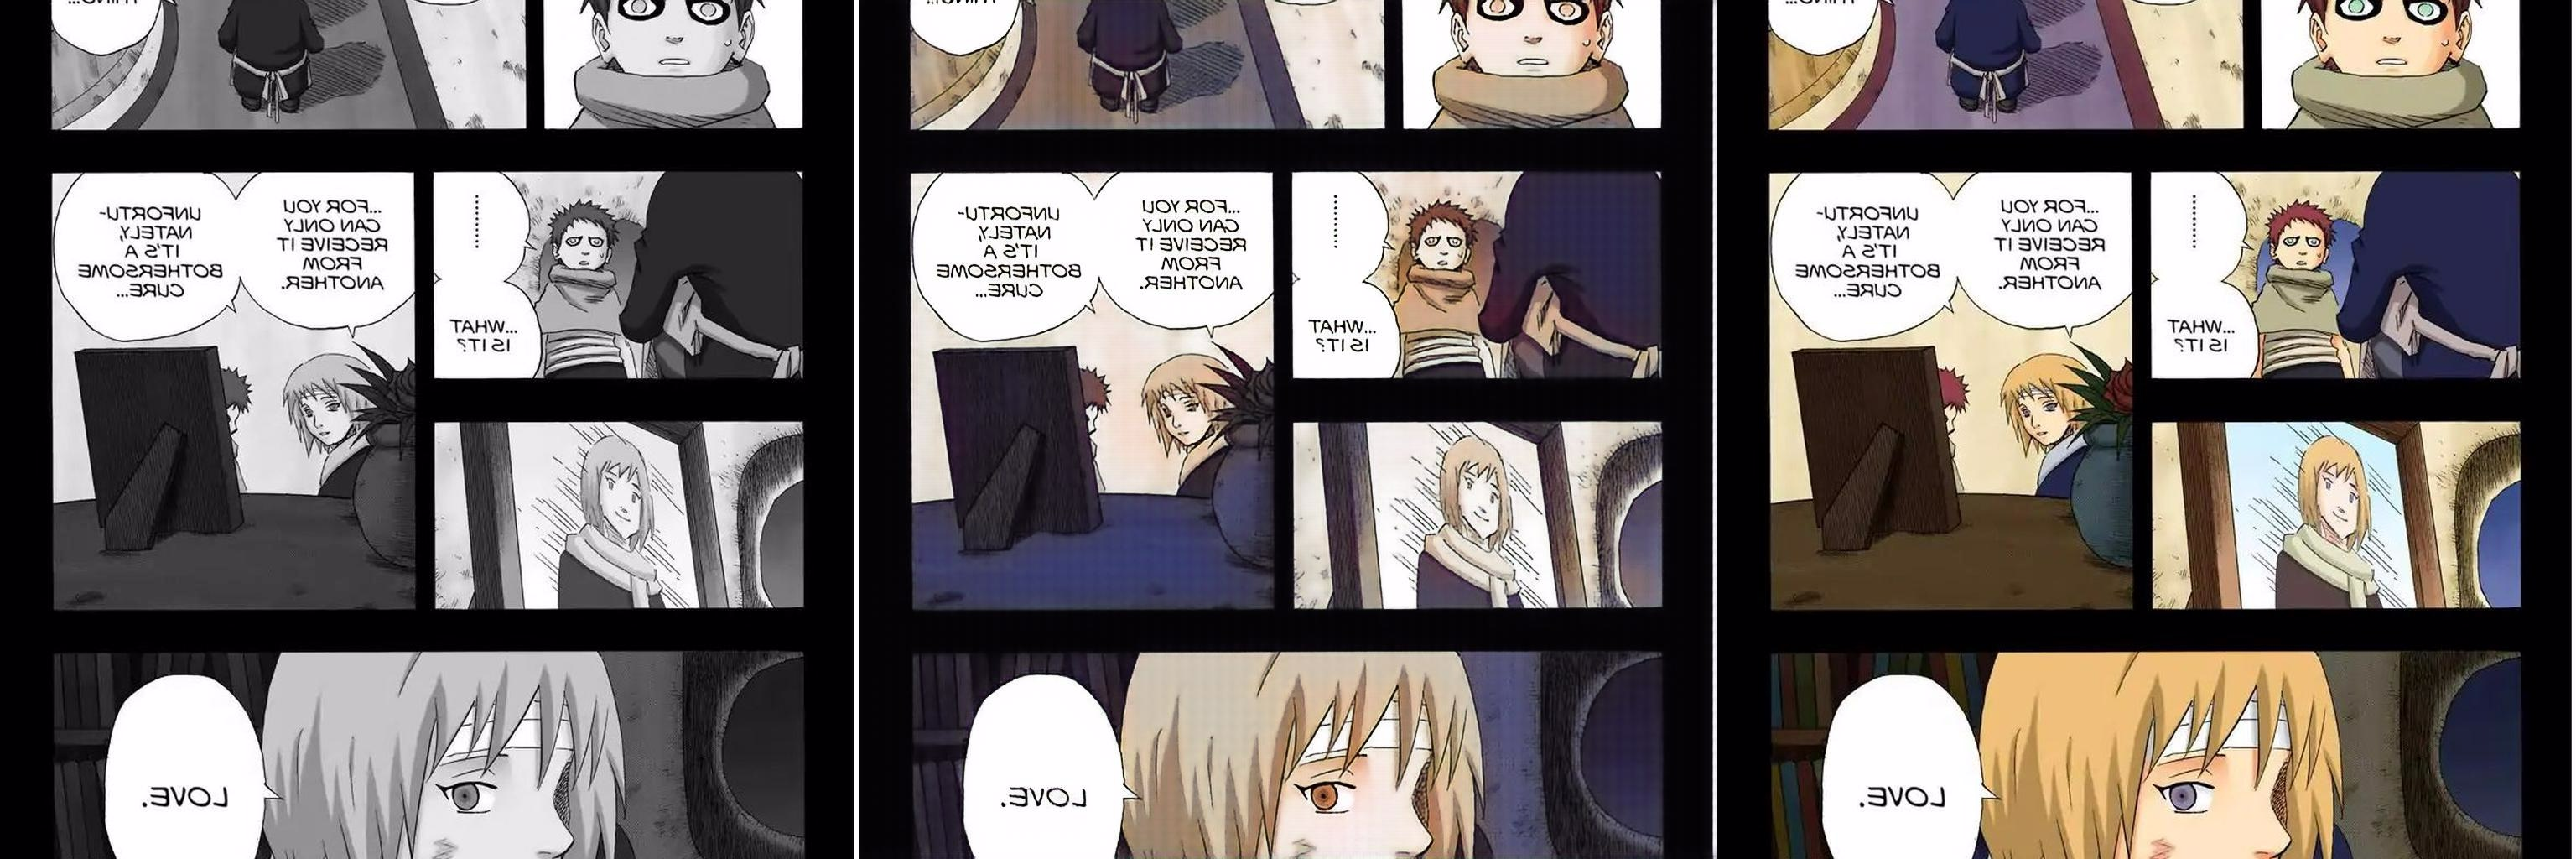